#**TUGAS PRAKTIKUM 1**

**Import library**

In [11]:
# --- Install library (jika belum ada) ---
!pip install scikit-learn matplotlib pandas

# --- Import library ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

**Load dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CC_Customer_Dataset.csv to CC_Customer_Dataset (1).csv


In [3]:
df = pd.read_csv("CC_Customer_Dataset.csv")


**Cek Data**

In [4]:
print(df.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


In [5]:
df_features = df.drop(columns=["Sl_No", "Customer Key"])

**Stndarisasi Data**

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

**Agglomerative Clustering**

In [13]:
agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg_clust.fit_predict(X_scaled)

**label cluster ke dataset**

In [8]:
df["Cluster"] = labels

**Evaluasi model**

In [14]:
sil_score = silhouette_score(X_scaled, labels)
dbi_score = davies_bouldin_score(X_scaled, labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index (DBI): {dbi_score:.3f}")

Silhouette Score: 0.515
Davies-Bouldin Index (DBI): 0.681


**Scatter plot (Avg_Credit_Limit vs Total_Credit_Cards)**

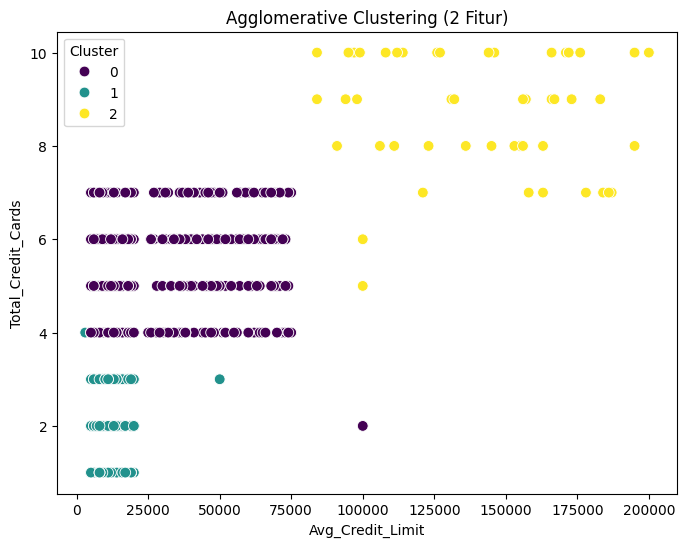

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Avg_Credit_Limit"],
    y=df["Total_Credit_Cards"],
    hue=df["Cluster"],
    palette="viridis",
    s=60
)
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_Credit_Cards")
plt.title("Agglomerative Clustering (2 Fitur)")
plt.legend(title="Cluster")
plt.show()

**Dendrogram**

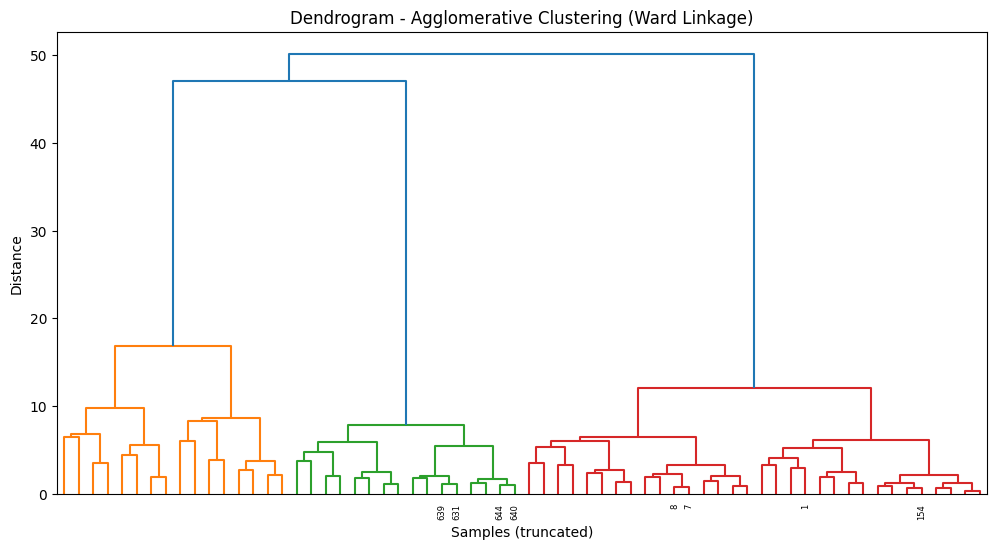

In [15]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           truncate_mode="level",  # biar lebih ringkas
           p=5)
plt.title("Dendrogram - Agglomerative Clustering (Ward Linkage)")
plt.xlabel("Samples (truncated)")
plt.ylabel("Distance")
plt.show()